scattering angle (deg) = [0.87789613]
recoil_angle (deg) = [-59.09115494]
sum of two angles is not 90 deg
tot x-momentum (kg m/s):[10.]
tot y-momentum (kg m/s):[0.]


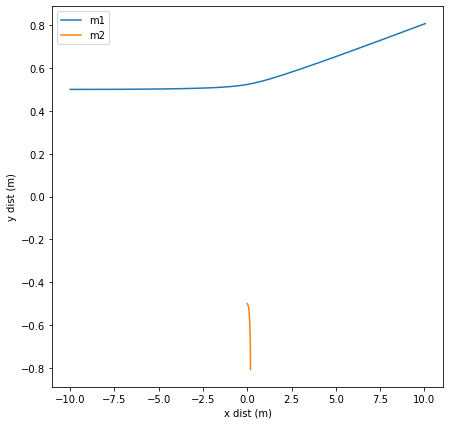

In [73]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from matplotlib.pyplot import figure

#a)

def model(z,t):
    k=1
    b=1
    x1,x1_,y1,y1_,x2,x2_,y2,y2_=z
    r = np.sqrt((x2-x1)**2+(y2-y1)**2)
    fac=k*b**2/r
     
    dz_dt = [x1_,-fac*(x2-x1)/r,y1_,-fac*(y2-y1)/r,x2_,fac*(x2-x1)/r,y2_,fac*(y2-y1)/r]
    return dz_dt

t1= np.arange(0,2.025,step=0.001)
sol = odeint(model,[-10,10,0.5,0,0,0,-0.5,0],t1)

figure(1,figsize=(7,7))
plt.plot(sol[:,0],sol[:,2],label='m1')
plt.plot(sol[:,4],sol[:,6],label='m2')
plt.xlabel('x dist (m)')
plt.ylabel('y dist (m)')
plt.legend()
#using trial and error from the printed value below I found t~2.025 was when the seperation became ~10m
#print(np.sqrt((sol[-1:,4]-sol[-1,0])**2+(sol[-1:,6]-sol[-1,2])**2))

#b)
scattering_angle=np.arctan((sol[-1:,2]-0.5)/(sol[-1:,0]+10))
print("scattering angle (deg) = "+str(scattering_angle*180/np.pi))
recoil_angle=np.arctan((sol[-1:,6]+0.5)/(sol[-1:,4]))
print("recoil_angle (deg) = "+str(recoil_angle*180/np.pi))
print('sum of two angles is not 90 deg')

#c)
#x direction (should equal 10 kg m/s):
print('tot x-momentum (kg m/s):'+str(sol[-1:,1]+sol[-1:,5]))
#y direction (should equal 0 kg m/s)
print('tot y-momentum (kg m/s):'+str(sol[-1:,3]+sol[-1:,7]))